# Metadata analysis and script generation for Lori Allen Data Processing

In [ ]:
import numpy as np
import pickle
from astropy.io.votable import parse
import matplotlib.pyplot as plt
import pandas as pd

import healpy as hp
import pointing_groups as pg

%matplotlib inline

# Data and data masking

In [2]:
"""
df = pg.load_raw_data()
Pointing_Groups = pg.sort_pointings(df)
pg.pickle_pointings(Pointing_Groups)
"""

with open('PickledPointings.pkl', 'rb') as f:
    Pointing_Groups = pickle.load(f)
    
den_visit,den_ccd,den_stellarnum = np.loadtxt('ref_data.txt',unpack=True)
unique_den_visit = np.unique(den_visit)
max_stellarnum = []
_= [ max_stellarnum.append(np.max(den_stellarnum[den_visit==visit])) for visit in unique_den_visit ]
max_stellarnum = np.array(max_stellarnum)

for i,group in enumerate(Pointing_Groups):
    group_max = np.concatenate([ (max_stellarnum[(unique_den_visit==x)]) for x in np.array(Pointing_Groups[i]["visit_id"],dtype=np.float_) ])
    if not(group_max.size):
        group_max=[-9999.]
    group_max = np.max(group_max)
    Pointing_Groups[i]['stellar_density'] = group_max
    
# visitToIndex is a dictionary that returns the index of a given visit
visitToIndex = {}
for i,pointing in enumerate(Pointing_Groups):
    for visit in pointing['visit_id']:
        visitToIndex[str(visit)] = i

In [43]:
i=0
for pointing in Pointing_Groups:
    if len(np.unique(pointing['survey_night']))>=4:
        i+=1
print(i)

372


In [44]:
"""
makeDiscreteSkyMap.py repo-with-images --output desired-coadd-landing-place --id some-butler-id-here
makeCoaddTempExp.py repo-with-images --output desired-coadd-landing-place --selectId butler-id-for-input-images --id filter=g --config makePsfMatched=True
assembleCoadd.py repo-with-images --output desired-coadd-landing-place --warpCompareCoadd --selectId butler-id-for-input-images --id filter=g tract=0 patch=1,2^1,3^1,4 [yes you have to be explicit] --config doInterp=True
imageDifference.py . --output ../coadd/ --id visit= ccdnum=1^3..60^62 filter=g --clobber-config --no-versions --config doSelectSources=False
"""
Pointing_Groups[23]

,visit_id,date_obs,ra,dec,filename,survey_night,stellar_density
0,303665,b'2014-04-23 03:10:44.037',212.142500,-12.421111,b'c4d_140423_031214_ooi_VR_v1.fits.fz',1,6984.0
1,303669,b'2014-04-23 03:15:22.493',212.141167,-12.422583,b'c4d_140423_031655_ooi_VR_v1.fits.fz',1,6984.0
2,303673,b'2014-04-23 03:20:02.329',212.141833,-12.422528,b'c4d_140423_032134_ooi_VR_v1.fits.fz',1,6984.0
3,303677,b'2014-04-23 03:24:35.038',212.141875,-12.421389,b'c4d_140423_032605_ooi_VR_v1.fits.fz',1,6984.0
4,303681,b'2014-04-23 03:29:13.181',212.141833,-12.421972,b'c4d_140423_033047_ooi_VR_v1.fits.fz',1,6984.0
5,304356,b'2014-04-24 03:42:35.344',212.144875,-12.421361,b'c4d_140424_034408_ooi_VR_v1.fits.fz',2,6984.0
6,304360,b'2014-04-24 03:47:15.223',212.144667,-12.420639,b'c4d_140424_034848_ooi_VR_v1.fits.fz',2,6984.0
7,304364,b'2014-04-24 03:51:55.539',212.143583,-12.420917,b'c4d_140424_035326_ooi_VR_v1.fits.fz',2,6984.0
8,304368,b'2014-04-24 03:56:34.379',212.143500,-12.421972,b'c4d_140424_035808_ooi_VR_v1.fits.fz',2,6984.0
9,304372,b'2014-04-24 04:01:14.413',212.143167,-12.422389,b'c4d_140424_040247_ooi_VR_v1.fits.fz',2,6984.0


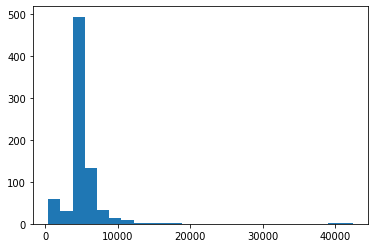

In [6]:
den_visits,den_ccd,den_count = np.loadtxt('ref_data.txt',unpack=True)
unique_visits = np.unique(den_visits)
max_den = -9999*np.ones(len(unique_visits))

for i,visit in enumerate(unique_visits):
    max_den[i]=np.max(den_count[den_visits==visit])
    
_=plt.hist(max_den,bins=25)

for i in range(len(Pointing_Groups)):
    Pointing_Groups[i]['stellar_den'] = max_den[unique_visits==Pointing_Groups[i]['visit_id'][0]][0]
    
for pointing in Pointing_Groups:
    if pointing['stellar_den'][0] != np.mean(pointing['stellar_den']):
        print('Bad stellar density at {visit}'.format(visit=pointing['visit_id'][0]))

In [7]:
# We define "Bad Groups" as groups where the maximum separation between image centers is greater than 25 arcsec

Bad_Group_Index = []
Arcsec_Tol = 25 # Tolerance defining a bad group in arcseconds
for i in range(len(Pointing_Groups)):
    RAResidual = Pointing_Groups[i]["ra"].values-np.mean(Pointing_Groups[i]["ra"].values)
    RAResidual*=3600
    DECResidual = Pointing_Groups[i]["dec"].values-np.mean(Pointing_Groups[i]["dec"].values)
    if (np.max(abs(RAResidual))>Arcsec_Tol or np.max(abs(DECResidual))>Arcsec_Tol):
        Bad_Group_Index.append(i)
    DECResidual*=3600
    #plt.plot(RAResidual,'r')
    #plt.plot(DECResidual,'b')
    
print("There are {bad_group_num} bad groups in the data.".format(bad_group_num=len(Bad_Group_Index)))
print("The indicies for the bad groups are:\n"+str(Bad_Group_Index))

There are 28 bad groups in the data.
The indicies for the bad groups are:
[28, 169, 170, 184, 408, 424, 425, 426, 427, 428, 429, 430, 506, 509, 533, 534, 537, 538, 540, 541, 542, 633, 683, 717, 718, 719, 722, 724]


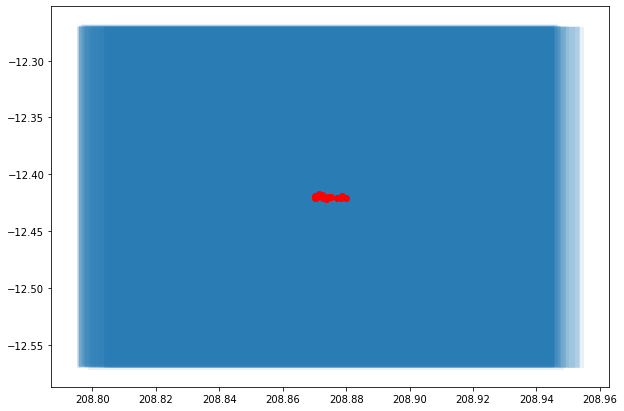

In [8]:
# This cell plots the bad pointings in order to visualize the spread of pointings in the bad pointing groups
#%matplotlib notebook
#for index in Bad_Group_Index:
for index in [11]:
    pg.plot_pointings(Pointing_Groups[index]["visit_id"],Pointing_Groups[index]["ra"],Pointing_Groups[index]["dec"])

# Script generation

In [4]:
import jobmaker
import matcher

## ProcessCCD.py

In [15]:
# This cell creates the linking script for processing the dataset on hyak
jobmaker.link_instcal_files(Pointing_Groups,'/gscratch/scrubbed/smotherh/NEO',
                       '/gscratch/scrubbed/smotherh/refcats/htm',
                       '/scr/astro/smotherh/pointing_groups',script_name='link_files_hyak_local_test.sh')

In [10]:
# This cell creates the linking script for processing the dataset on epyc
jobmaker.link_instcal_files(Pointing_Groups,'/astro/store/pogo4/jbkalmbach/NEO',
                       '/astro/store/epyc/users/smotherh/refcats/htm',
                       '/astro/store/epyc/users/smotherh/pointing_groups',script_name='link_files_epyc.sh')

In [17]:
jobmaker.process_visits(Pointing_Groups,'/scr/astro/smotherh/pointing_groups',
                        [51,51],script_name='process_visits_51_hyak_local_test.sh',num_cores=28)

In [5]:
known_data = np.loadtxt('/epyc/projects2/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/known_object_list.txt')
known_idx = np.unique(known_data[:,0]).astype(int)
Known_Objs_PG = [Pointing_Groups[i] for i in known_idx]
jobmaker.process_visits(Pointing_Groups,'/gscratch/scrubbed/smotherh/pointing_groups',
                        known_idx,pg_idx_type='index',script_name='process_known_visits_baldur.sh',num_cores=20)

In [8]:
# This cell generates the bash linking script for getting one image from each field.
# c4d_140429_024704_ooi_VR_v1.fits.fz has INDEF for MAGZERO and causes a bug

with open("link_files_SampleFields.sh", "w") as f:

    dir_name = "SampleFields"
    f.write('\n# Link files for field: '+dir_name+'\n')
    f.write('mkdir '+dir_name+'\n')
    f.write('mkdir '+dir_name+'/ingest/\n')
    f.write('mkdir '+dir_name+'/ingest/instcal\n')
    f.write('mkdir '+dir_name+'/ingest/dqmask\n')
    f.write('mkdir '+dir_name+'/ingest/wtmap\n')
    for i in range(len(Pointing_Groups)):
        if Pointing_Groups[i]["survey_night"][0] != 3:
            link_files = ("ln -s /astro/store/pogo4/jbkalmbach/NEO/night_{nightnum}/night_{nightnum}/{filename} {destination}\n")
        else:
            link_files = ("ln -s /astro/store/pogo4/jbkalmbach/NEO/night_{nightnum}/night_{nightnum}/night_{nightnum}/{filename} {destination}\n")


        dqmask = Pointing_Groups[i]['filename'][0].decode('UTF-8')[0:20]+'d'+Pointing_Groups[i]['filename'][0].decode('UTF-8')[21:]
        wtmap = Pointing_Groups[i]['filename'][0].decode('UTF-8')[0:20]+'w'+Pointing_Groups[i]['filename'][0].decode('UTF-8')[21:]
        
        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/instcal/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=Pointing_Groups[i]["filename"][0].decode('UTF-8'),destination=destination))

        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/dqmask/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=dqmask,destination=destination))
        
        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/wtmap/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=wtmap,destination=destination))

## Image Differencing

In [24]:
default_epyc_settings = {
    "in_repos_topdir"  : "/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/",
    "out_repos_topdir" : "/epyc/users/dinob/imdiff/DECAM_DiffIm/pointing_group_imdiffs/",
    "cfgfile_path"     : "/epyc/users/dinob/imdiff/DECAM_DiffIm/config.py",

    "in_repo_rerun_dirstr" : "Pointing_Group_{groupid:03d}/processed_data/rerun/rerun_processed_data/",
    "out_saveloc_dirstr"   : "{groupid:03d}",
    
    "stdoutstr" : "imdiff_{visitid}.out",
    "stderrstr" : "imdiff_{visitid}.err",

    "script_namestr" : "job_group_{groupid:03d}",
    "self.save_path" : ".",

    "parallel" : True,
    "longlog"  : True,
    "limited"  : True,
    "perccd"   : False,
    "niced"    : True,

    "timeout" : 86400,
    "niceness" : "17",
    "ncpu" : 20,
    "ccd" : 1,
}

In [25]:
default_hyak_settings = {
    "in_repos_topdir"  : "/gscratch/scrubbed/smotherh/pointing_groups/",
    "out_repos_topdir" : "/gscratch/scrubbed/dinob/imdiff",
    "cfgfile_path"     : "/gscratch/scrubbed/dinob/config.py",

    "in_repo_rerun_dirstr" : "Pointing_Group_{groupid:03d}/processed_data/rerun/rerun_processed_data/",
    "out_saveloc_dirstr"   : "{groupid:03d}",
    
    "stdoutstr" : "imdiff_{visitid}.out",
    "stderrstr" : "imdiff_{visitid}.err",

    "script_namestr" : "slurm_group_{groupid:03d}",
    "self.save_path" : ".",

    "parallel" : False,
    "longlog"  : True,
    "limited"  : False,
    "perccd"   : False,
    "niced"    : False,

    "timeout" : 86400,
    "niceness" : "17",
    "ncpu" : 20,
    "ccd" : 10,
}

In [28]:
conf = jobmaker.JobConf(**default_epyc_settings)
conf.save_path = "/home/hayden/Desktop"
for groupid in range(300, 301):
    jobmaker.slurm_script_from_groupid(Pointing_Groups, groupid, conf)

## Image Warping

In [15]:
default_warp_settings = default_hyak_settings.copy()

default_warp_settings["in_repos_topdir"]  = "/gscratch/scrubbed/dinob/imdiff"
default_warp_settings["out_repos_topdir"] = "/gscratch/scrubbed/dinob/warps"

default_warp_settings["stdoutstr"] = "warp_{visitid:03d}.out"
default_warp_settings["stderrstr"] = "warp_{visitid:03d}.err"
default_warp_settings["script_namestr"] = "warp_group_{groupid:03d}"

warpcmd = "./warp.py {groupid} > {stdoutpath} 2>{stderrpath}"

In [16]:
conf = jobmaker.JobConf(**default_warp_settings)
jobmaker.slurm_warp_script_from_groupid(40, conf, cmd=warpcmd)

In [21]:
foo = np.unique(Pointing_Groups[100]['survey_night'])[:-2]
nights = Pointing_Groups[100]['survey_night']
Pointing_Groups[100]['visit_id'][np.in1d(nights,foo)]

0     438907
1     438911
2     438915
3     438919
4     438923
5     439557
6     439561
7     439565
8     439569
9     439573
10    440317
11    440321
12    440325
13    440329
14    440333
Name: visit_id, dtype: int64

In [10]:
len(Pointing_Groups[385])

20

In [11]:
pgIndex = np.linspace(150,299,150).astype(int)
print(pgIndex)

[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299]


In [38]:
pgNum=224
nights = Pointing_Groups[pgNum]['survey_night']
splitNum = int(len(np.unique(nights))/2)
nightsFirstTen = np.unique(nights)[:splitNum]
nightsSecondTen = np.unique(nights)[-splitNum:]
visitFirstTen = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,nightsFirstTen)].values
visitFirstHalf = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,np.unique(nights)[:-splitNum])].values
visitSecondTen = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,nightsSecondTen)].values
print(visitFirstTen)
print(visitSecondTen)
print(visitFirstHalf)

[310215 310219 310223 310227 310231 310522 310526 310530 310534 310538]
[310844 310848 310852 310856 310860 311109 311113 311117 311121 311125]
[310215 310219 310223 310227 310231 310522 310526 310530 310534 310538]


In [13]:
'''rerun chaining example: image
processCcd.py . --rerun rerun_processed_data --id visit=303605..306247 ccdnum=29 -j10 --longlog -C configProcessCcd_neo.py
makeDiscreteSkyMap.py . --rerun rerun_processed_data:secondHalf --id visit=303605..304312 -j10
makeCoaddTempExp.py . --rerun secondHalf --selectId visit=303605..304312 --id filter=r -j10
assembleCoadd.py . --rerun secondHalf --selectId visit=303605..304312 --id filter=r tract=0 patch=0,0 --config doInterp=True -j10
imageDifference.py . --rerun secondHalf --id visit=305549..306247 ccdnum=29 filter=r --config doSelectSources=False'''
pgNum = 101
coreNum = 28
def writeCoaddScript(pgNum, coreNum, pg_path, lsst_path, file_name="run_coadd_{:03}.sh"):
    if len(Pointing_Groups[pgNum]) < 20:
        return(0)
    try:
        nights = Pointing_Groups[pgNum]['survey_night']
        splitNum = int(len(np.unique(nights))/2)
        nightsFirstTen = np.unique(nights)[:splitNum]
        nightsSecondTen = np.unique(nights)[-splitNum:]
        visitFirstTen = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,nightsFirstTen)].values
        visitFirstHalf = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,np.unique(nights)[:-splitNum])].values
        visitSecondTen = Pointing_Groups[pgNum]['visit_id'][np.in1d(nights,nightsSecondTen)].values

        with open(file_name.format(pgNum),'w') as f:
            f.write("echo \"Running Pointing Group {:03}\"\n".format(pgNum))
            f.write("source {}/loadLSST.bash\n".format(lsst_path))
            f.write("setup lsst_distrib\n")
            f.write("cd {}/Pointing_Group_{:03}/processed_data\n".format(pg_path, pgNum))
            f.write("echo \"Begin makeDiscreteSkyMap.py First Half\"\n")
            f.write("makeDiscreteSkyMap.py . --rerun rerun_processed_data:diffFirstHalf --id visit={}..{} --clobber-config --no-versions -j{}\n".format(visitSecondTen[0],visitSecondTen[-1],coreNum))
            f.write("echo \"Begin makeCoaddTempExp.py First Half\"\n")
            f.write("makeCoaddTempExp.py . --rerun diffFirstHalf --selectId visit={}..{} --id filter=r --clobber-config --no-versions -j{}\n".format(visitSecondTen[0],visitSecondTen[-1],coreNum))
            f.write("cd {}/Pointing_Group_{:03}/processed_data/rerun/diffFirstHalf/deepCoadd/r/0/\n".format(pg_path, pgNum))
            f.write("export PATCHNUMS=\"$(ls -d *tempExp | sed 's/tempExp/^/' | tr -d '\\n' | sed 's/.$//')\"\n")
            f.write("cd {}/Pointing_Group_{:03}/processed_data/\n".format(pg_path, pgNum))
            f.write("echo \"Begin assembleCoadd.py First Half\"\n")
            f.write("assembleCoadd.py . --rerun diffFirstHalf --selectId visit={}..{} --id filter=r tract=0 patch=$PATCHNUMS --clobber-config --no-versions --config doInterp=True -j{}\n".format(visitSecondTen[0],visitSecondTen[-1],coreNum))
            f.write("echo \"Begin imageDifference.py First Half\"\n")
            f.write("imageDifference.py . --rerun diffFirstHalf --id visit={}..{} ccdnum=1^3..60^62 filter=r --clobber-config --no-versions --config doSelectSources=False -j{}\n".format(visitFirstHalf[0],visitFirstHalf[-1],coreNum))

            f.write("echo \"Begin makeDiscreteSkyMap.py Second Half\"\n")
            f.write("makeDiscreteSkyMap.py . --rerun rerun_processed_data:diffSecondHalf --id visit={}..{} --clobber-config --no-versions -j{}\n".format(visitFirstTen[0],visitFirstTen[-1],coreNum))
            f.write("echo \"Begin makeCoaddTempExp.py Second Half\"\n")
            f.write("makeCoaddTempExp.py . --rerun diffSecondHalf --selectId visit={}..{} --id filter=r --clobber-config --no-versions -j{}\n".format(visitFirstTen[0],visitFirstTen[-1],coreNum))
            f.write("cd {}/Pointing_Group_{:03}/processed_data/rerun/diffSecondHalf/deepCoadd/r/0/\n".format(pg_path, pgNum))
            f.write("export PATCHNUMS=\"$(ls -d *tempExp | sed 's/tempExp/^/' | tr -d '\\n' | sed 's/.$//')\"\n")
            f.write("cd {}/Pointing_Group_{:03}/processed_data/\n".format(pg_path, pgNum))
            f.write("echo \"Begin assembleCoadd.py Second Half\"\n")
            f.write("assembleCoadd.py . --rerun diffSecondHalf --selectId visit={}..{} --id filter=r tract=0 patch=$PATCHNUMS --clobber-config --no-versions --config doInterp=True -j{}\n".format(visitFirstTen[0],visitFirstTen[-1],coreNum))
            f.write("echo \"Begin imageDifference.py Second Half\"\n")
            f.write("imageDifference.py . --rerun diffSecondHalf --id visit={}..{} ccdnum=1^3..60^62 filter=r --clobber-config --no-versions --config doSelectSources=False -j{}\n".format(visitSecondTen[0],visitSecondTen[-1],coreNum))
            f.write("cd {}/Pointing_Group_{:03}/\n".format(pg_path, pgNum))
    except Exception as e: 
        print('Failed to process pointing group {:03}'.format(pgNum))
        raise
            
            
        #f.write("mkdir warps\n")
        #f.write("mkdir warps/{01..62}")
#pgIndex = np.linspace(300,399,100).astype(int)
#print(pgIndex)
#for i in pgIndex:
#    writeCoaddScript(i,coreNum)

In [14]:
known_data = np.loadtxt('/epyc/projects2/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/known_object_list.txt')
known_idx = np.unique(known_data[:,0]).astype(int)
for i in known_idx:
    writeCoaddScript(i, 20, '/epyc/users/smotherh/pointing_groups', '/epyc/users/smotherh/lsst_20', file_name='run_coadd_baldur_{:03}.sh')

## KBMOD

In [ ]:
with open("run_warps.sh")

f.write("./warp.py 301 > /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/301/warp301.out 2>/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/301/warp301.err")

# Analysis and plotting

In [9]:
import astropy.units as u

def findMinVel(max_time,max_distance=200*u.AU):
    
    if max_time.si >= .5*u.yr:
        Reflex_Distance = 2*u.AU
    else:
        theta = np.pi*u.radian*max_time/(1*u.yr)
        theta =theta.to(u.radian)
        if theta > np.pi/2 * u.radian:
            theta -= np.pi/2 * u.radian
            
        print(theta)
        Reflex_Distance = 2*np.sin(theta)*1*u.AU
    
    parallax_angle = np.arctan(Reflex_Distance/(2*max_distance))
    angular_speed = parallax_angle/max_time
    angular_speed = angular_speed.to(u.arcsec/u.hr)
    return(angular_speed)

In [10]:
findMinVel(1*u.day,max_distance=100*u.AU)


0.008601211919479242 rad


<Quantity 0.7392106 arcsec / h>

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


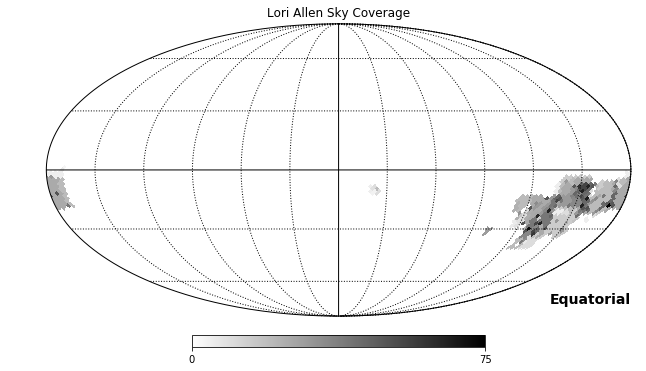

In [28]:
RA = []
DEC = []

for i,pointing in enumerate(Pointing_Groups):
    RA.append(pointing["ra"])
    DEC.append(pointing["dec"])
    
RA = np.concatenate(RA)
DEC = np.concatenate(DEC)

NSIDE =  32 #nside determines the size of the pixels
pixels = hp.ang2pix(NSIDE, np.radians(90-DEC), np.radians(RA)) #NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE)) * hp.UNSEEN #by convention non   hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] =  pixels_binned
hitmap[hitmap==hp.UNSEEN] = 0
hp.mollview(hitmap, xsize=2000, coord='C', title='Lori Allen Sky Coverage',cmap='binary')
hp.graticule() 
#plt.savefig('Lori_Allen_Sky_Coverage.pdf')

12894
12894


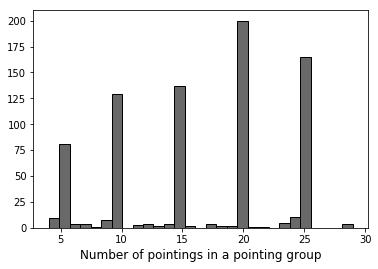

In [12]:
visit_id=np.concatenate([np.array(field["visit_id"],dtype=np.float_) for field in Pointing_Groups])
print(len(visit_id))
print(len(np.unique(visit_id)))
plt.figure()
num_visits = [len(pointing) for pointing in Pointing_Groups]
_=plt.hist(num_visits,bins=29,color='dimgrey',edgecolor='k')
plt.xlabel('Number of pointings in a pointing group',fontsize=12)
plt.savefig('pointings_hist.pdf')

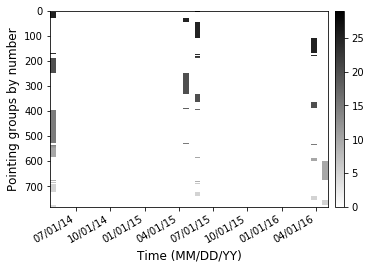

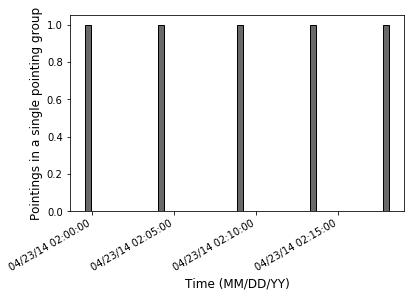

In [111]:
import matplotlib.dates as mdates
import datetime as dt
from dateutil.parser import parse

times=[[]]*len(Pointing_Groups)
for i,pointing in enumerate(Pointing_Groups):
    times[i]=np.array([0.]*len(Pointing_Groups[i]['date_obs']))
    for j in range(len(Pointing_Groups[i]['date_obs'])):
        foo = parse(Pointing_Groups[i]['date_obs'][j])
        times[i][j]= foo.timestamp()

times=np.array(times)

hist_times = [[]]*len(times)
min_time=np.min(np.concatenate(times))
max_time=np.max(np.concatenate(times))

for i,time in enumerate(times):
    hist_times[i],bin_edges = np.histogram(time,range=[min_time,max_time],bins=50)
hist_times = np.array(hist_times)

x0=dt.datetime.fromtimestamp(bin_edges[0])
x1=dt.datetime.fromtimestamp(bin_edges[-1])
x_lims = mdates.date2num([x0,x1])

fig,ax1 = plt.subplots()

#cut_hist_times = [[]]*len(times)
#hist_times[hist_times==0]=-9999
im=ax1.imshow(hist_times,aspect='auto',extent=(x_lims[0],x_lims[1],len(hist_times),0),cmap='binary')
fig.colorbar(im,ax=ax1,pad=0.02)


ax1.xaxis_date()

date_format = mdates.DateFormatter('%D')

ax1.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

ax1.set_xlabel('Time (MM/DD/YY)',fontsize=12)
ax1.set_ylabel('Pointing groups by number',fontsize=12)
plt.savefig('total_time_data.pdf')

fig,ax2 = plt.subplots()

pg2_times = np.array([mdates.date2num(parse(x)) for x in Pointing_Groups[10]['date_obs'][0:5]])

ax2.hist(pg2_times,bins=50,color='dimgrey',edgecolor='k')

ax2.xaxis_date()
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M:%S'))
ax2.set_xlabel('Time (MM/DD/YY)',fontsize=12)
ax2.set_ylabel('Pointings in a single pointing group',fontsize=12)
fig.autofmt_xdate()
plt.savefig('example_time_data.pdf')
plt.show()


(782, 50)


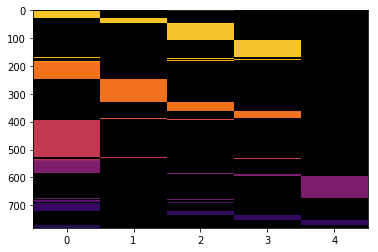

In [14]:
a = hist_times
print(np.shape(a))
bar = np.array([b[~(a==0).all(0)] for b in a])
plt.imshow(bar,aspect='auto',cmap='inferno')

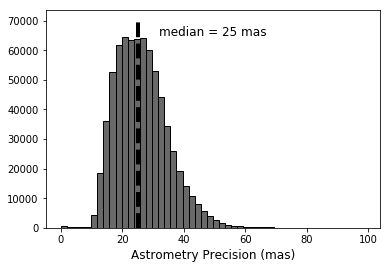

In [21]:
# We can parse the astrometry measurements from the log using the command:
# grep -i "arcsec" processCcd.log | cut -f2- -d= > astrometry.log

astrometry_all,astrom_err=np.loadtxt('astrometry.log',unpack=True,usecols=(0,2))
astrometry = astrometry_all[astrometry_all<.1]
fig,ax = plt.subplots()
ax.hist(astrometry*1000,edgecolor='k',color='dimgrey',bins=50)
plt.text(0.5, 0.9,'median = {0:.0f} mas'.format(np.median(astrometry)*1000),
         ha='center', va='center', transform=ax.transAxes,fontsize=12)
plt.xlabel('Astrometry Precision (mas)',fontsize=12)
plt.vlines(np.median(astrometry)*1000,0,70000,lw=4,linestyles='--',color='k')
plt.savefig('astrometry_example.pdf')

In [35]:
i = 0
for pointing in Pointing_Groups:
    if len(np.unique(pointing['survey_night']))>3:
        i+=1
print(i)

372


In [101]:
i=0
for pointing in Pointing_Groups:
    if pointing['stellar_density'][0] > 10000:
        i+=1
print(i)

24


In [106]:
import matplotlib.dates as mdates
import datetime as dt
from dateutil.parser import parse
from astropy import time

with open("loriallen_times.dat","w") as f:
    f.write("# visit_id mean_julian_date\n")
    
with open("loriallen_times.dat","a") as f:
    for i,pointing in enumerate(Pointing_Groups):
        for j in range(len(Pointing_Groups[i]['date_obs'])):
            t = time.Time(Pointing_Groups[i]['date_obs'][j].decode())
            visit = Pointing_Groups[i]['visit_id'][j]
            f.write(str(visit)+" "+str(t.mjd)+"\n")

In [126]:
import matplotlib.dates as mdates
import datetime as dt
from dateutil.parser import parse
from astropy import time
time_16 = []
for row in Pointing_Groups[16]['date_obs']:
    time_16.append(time.Time(row.decode()))
print(time_16[19].mjd)
print(time_16[0].mjd)

56773.1135602662
56770.11368689815


In [135]:
print(t.mjd)
print(times[121][0])

NameError: name 't' is not defined

In [2]:
pg = 300

doWarps=True
doKBMOD=False

with open("run_kbmod_{point:03d}.sh".format(point=pg),"w") as f:
    if doWarps:
        f.write("source /astro/store/epyc/users/smotherh/lsst_16/loadLSST.bash\n")
        f.write("setup lsst_distrib\n")
        f.write("mkdir /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/{point:03d}".format(point=pg)+"/{01..62}\n")
        f.write("cd /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps\n")
        f.write("./warp.py {point:03d} > /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/{point:03d}/warp{point:03d}.out 2>/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/{point:03d}/warp{point:03d}.err\n".format(point=pg))
    if doKBMOD:
        f.write("source /astro/store/epyc/users/smotherh/kbmod/setup.bash\n")
        for i in range(1,63):
            if (i!=2) and (i!=61):
                f.write("python /astro/store/epyc/users/smotherh/kbmod/examples/example_search.py --image_dir /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/warps/{point:03d}/{ccd:02d}/ --results_dir /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/kbmod_results/{point:03d}/{ccd:02d} --time_file /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/loriallen_times.dat\n".format(point=pg,ccd=i))

In [ ]:
from astropy.io import fits
ccd_nums = np.linspace(1,62,62).astype(int)
ccd_nums = ccd_nums[ccd_nums!=2]
ccd_nums = ccd_nums[ccd_nums!=61]
pg_nums = np.linspace(91,100,100+1-91).astype(int)
calexp_len = {}
deepdiff_len = {}
calexp_file_path = '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{pg:03d}/processed_data/rerun/rerun_processed_data/{visit:07d}/src/src-{visit:07d}_{ccd:02d}.fits'
deepdiff_first_file_path = '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{pg:03d}/processed_data/rerun/rerun_processed_data/diffFirstHalf/deepDiff/v{visit:06d}/diaSrc-{ccd:02d}.fits'
deepdiff_second_file_path = '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{pg:03d}/processed_data/rerun/rerun_processed_data/diffSecondHalf/deepDiff/v{visit:06d}/diaSrc-{ccd:02d}.fits'

for pg_num in pg_nums:
    for visit in Pointing_Groups[pg_num]['visit_id']:
        for ccd in ccd_nums:
            try:
                try:
                    diff_hdul = fits.open(deepdiff_first_file_path.format(pg=pg_num,visit=visit,ccd=ccd))
                except:
                    diff_hdul = fits.open(deepdiff_second_file_path.format(pg=pg_num,visit=visit,ccd=ccd))
                calexp_hdul = fits.open(calexp_file_path.format(pg=pg_num,visit=visit,ccd=ccd))
            except:
                continue
            object_key = str(pg_num)+'_'+str(visit)+'_'+str(ccd)
            diff_data = diff_hdul[1].data
            deepdiff_len[object_key] = (len(diff_data['id']))
            calexp_data = calexp_hdul[1].data
            calexp_len[object_key] = (len(calexp_data['id']))
diff_hdul.close()
calexp_hdul.close()

with open('calexp_src_stats.pkl', 'wb') as f:
        pickle.dump(calexp_len, f)
with open('diff_src_stats.pkl', 'wb') as f:
        pickle.dump(deepdiff_len, f)

deepDiff Median = 180.0
calexp Median  3396.0
ratio: 18.866666666666667


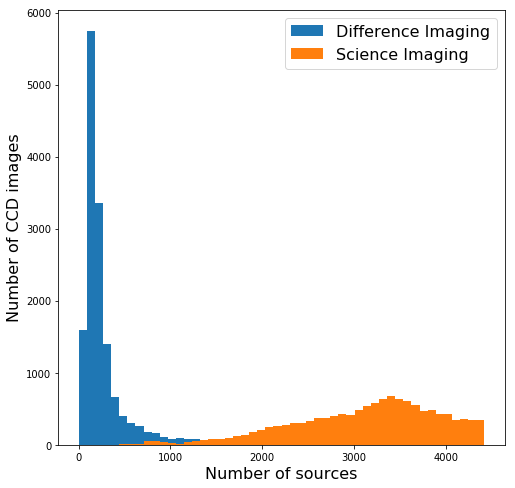

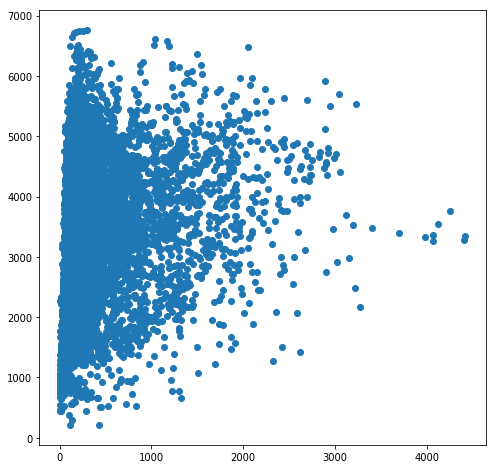

In [120]:
diff_len_list = list(deepdiff_len.values())
calexp_len_list = list(calexp_len.values())
diff_med = np.median(diff_len_list)
calexp_med = np.median(calexp_len_list)
plt.figure(figsize=[8,8])
len_range = (np.min(np.ravel(diff_len_list, calexp_len_list)), np.max(np.ravel(diff_len_list, calexp_len_list)))
_=plt.hist(diff_len_list, range=len_range, bins=50)
_=plt.hist(calexp_len_list, range=len_range, bins=50)
plt.legend(['Difference Imaging','Science Imaging'],fontsize=16)
plt.xlabel('Number of sources', fontsize=16)
plt.ylabel('Number of CCD images', fontsize=16)
plt.savefig('Source_comparison.png')
#plt.title('Number of sources in difference imaging and science imaging')
print('deepDiff Median = '+str(np.median(diff_len_list)))
print('calexp Median  '+str(np.median(calexp_len_list)))
print('ratio: '+str(np.median(calexp_len_list)/np.median(diff_len_list)))
plt.figure(figsize=[8,8])
plt.scatter(diff_len_list,calexp_len_list)

In [101]:
diff_hdul = fits.open(deepdiff_file_path.format(pg=pg_num,visit=visit,ccd=ccd))
calexp_hdul = fits.open(calexp_file_path.format(pg=pg_num,visit=visit,ccd=ccd))

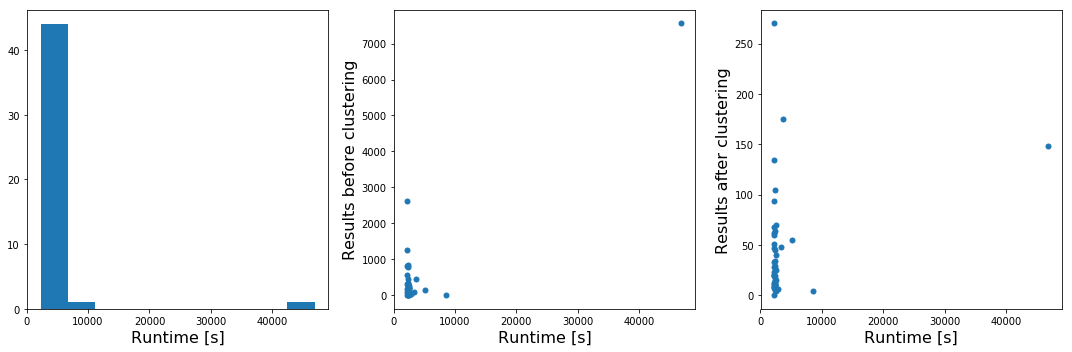

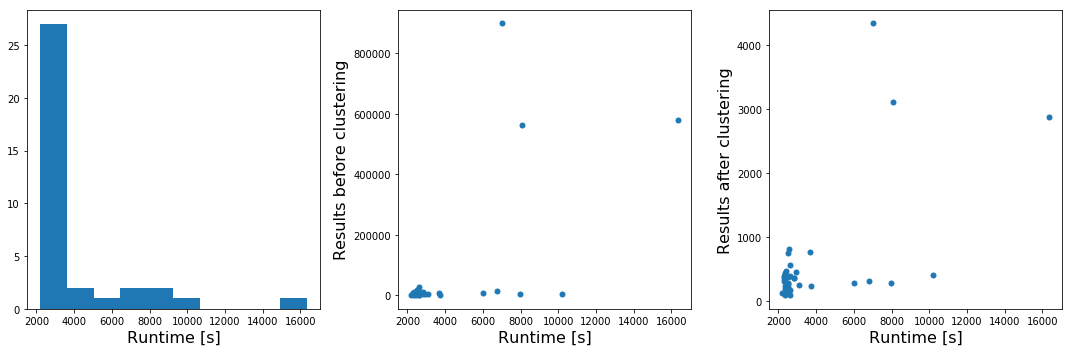

In [32]:
import numpy as np
import matplotlib.pyplot as plt
def makeRuntimePlots(time_path, res_path, clustering_path):
    pg_59_runtimes = np.loadtxt(time_path)
    pg_59_results = np.loadtxt(res_path)
    pg_59_clustering = np.loadtxt(clustering_path)

    fig,ax = plt.subplots(ncols=3,figsize=[15,5])
    ax[0].hist(pg_59_runtimes)
    ax[0].set_xlabel('Runtime [s]',fontsize=16)
    ax[1].plot(pg_59_runtimes,pg_59_clustering,'.',ms=10)
    ax[1].set_xlabel('Runtime [s]', fontsize=16)
    ax[1].set_ylabel('Results before clustering', fontsize=16)
    ax[2].plot(pg_59_runtimes,pg_59_results,'.',ms=10)
    ax[2].set_xlabel('Runtime [s]', fontsize=16)
    ax[2].set_ylabel('Results after clustering', fontsize=16)
    fig.tight_layout()

makeRuntimePlots('/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/time_59.txt',
                 '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/results_59.txt',
                 '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/clustering_59.txt')

makeRuntimePlots('/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/time_23.txt',
                 '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/results_23.txt',
                 '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/clustering_23.txt')

In [89]:
from astropy.io import fits
import pointing_groups as pg


# Seeing info is saved in PickledPointingswSeeing.pkl

def getPSF(pg,imagePath):
    seeing = []
    for i,row in pg.iterrows():
        visit_id = row['visit_id']
        ccd=20
        try:
            fitsPath = '{path}/processed_data/rerun/rerun_processed_data/{visit_id:07d}/calexp/calexp-{visit_id:07d}_{ccd_num:02d}.fits'.format(
                path=imagePath,visit_id=visit_id,ccd_num=ccd)
            hdul = fits.open(fitsPath)
            seeing.append(hdul[0].header.get('DIMMSEE')) #FWHM in arcsec
        except:
            seeing.append('NaN')
            # Open up the fits file of interest using the pre-defined filepath string

    return(seeing)
for pgNum in range(0,400):
    Pointing_Groups[pgNum]['Seeing'] = getPSF(Pointing_Groups[pgNum],'/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{:03}'.format(pgNum))

#pg.pickle_pointings(Pointing_Groups,filename='PickledPointingswSeeing.pkl')


In [3]:
seeing_limit = 1.25
good_seeing = []
with open('PickledPointingswSeeing.pkl', 'rb') as f:
    Pointing_Groups = pickle.load(f)

for pg in Pointing_Groups[0:400]:
    seeing = pg['Seeing'][~np.isnan(np.array(pg['Seeing']).astype(float))]
    good_seeing.append(len(seeing[seeing<seeing_limit]))
good_seeing = np.array(good_seeing)

In [10]:
import matplotlib.dates as mdates
import datetime as dt
from dateutil.parser import parse
from astropy import time
t = time.Time(Pointing_Groups[0]['date_obs'][0].decode())
print(t.mjd)

57162.42540605324


In [12]:
with open('/epyc/users/smotherh/LoriAllen/pointing_metadata/known_objects/allObjectData_2.pkl', 'rb') as f:
    allObjectData = pickle.load(f)
known_data = np.loadtxt('/epyc/projects2/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/known_object_list.txt')
known_format = "pg{:03d}_ccd{:02d}"
known_object_pg = np.unique(np.array(known_data)[:,0]).astype(int)
ccd_num = np.linspace(1,62,62).astype(int)
ccd_num = ccd_num[(ccd_num!=2) & (ccd_num!=61) & (ccd_num!=31)]
with open('link_reduce_first_night_known_objs.sh','w') as f:
    for pg_num in known_object_pg:
        pg = Pointing_Groups[pg_num]
        init_t = time.Time(pg['date_obs'][0].decode())
        #seeing_idx = np.where(pg['Seeing'][~np.isnan(np.array(pg['Seeing']).astype(float))]<seeing_limit)[0]
        #print(len(seeing_idx))
        f.write('mkdir /epyc/users/smotherh/DECAM_Data_Reduction/reduce_first_night_known_objs/{0:03}/\n'.format(pg_num))
        for ccd_idx in ccd_num:
            f.write('mkdir /epyc/users/smotherh/DECAM_Data_Reduction/reduce_first_night_known_objs/{0:03}/{1:02}/\n'.format(pg_num,ccd_idx))
            for i, visit_id in enumerate(pg['visit_id']):
                visit_time = time.Time(pg['date_obs'][i].decode())
                if (visit_time.mjd-init_t.mjd > 1) or (i==0):
                    f.write('ln -s /epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{0:03}/warps/{1:02}/{2}.fits /epyc/users/smotherh/DECAM_Data_Reduction/reduce_first_night_known_objs/{0:03}/{1:02}/\n'.format(pg_num,ccd_idx,visit_id))

In [51]:
with open('/epyc/users/smotherh/LoriAllen/pointing_metadata/known_objects/allObjectData_2.pkl', 'rb') as f:
    allObjectData = pickle.load(f)
known_data = np.loadtxt('/epyc/projects2/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/known_object_list.txt')
known_format = "pg{:03d}_ccd{:02d}"
known_object_pg = np.unique(np.array(known_data)[:,0]).astype(int)
ccd_num = np.linspace(1,62,62).astype(int)
ccd_num = ccd_num[(ccd_num!=2) & (ccd_num!=61) & (ccd_num!=31)]
with open('link_seeing_known_objs.sh','w') as f:
    for pg_num in known_object_pg:
        pg = Pointing_Groups[pg_num]
        seeing_idx = np.where(pg['Seeing'][~np.isnan(np.array(pg['Seeing']).astype(float))]<seeing_limit)[0]
        print(len(seeing_idx))
        f.write('mkdir /epyc/users/smotherh/DECAM_Data_Reduction/good_warps_known_objs/{0:03}/\n'.format(pg_num))
        for ccd_idx in ccd_num:
            f.write('mkdir /epyc/users/smotherh/DECAM_Data_Reduction/good_warps_known_objs/{0:03}/{1:02}/\n'.format(pg_num,ccd_idx))
            for idx in seeing_idx:
                visit_id = pg['visit_id'][idx]
                f.write('ln -s /epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{0:03}/warps/{1:02}/{2}.fits /epyc/users/smotherh/DECAM_Data_Reduction/good_warps_known_objs/{0:03}/{1:02}/\n'.format(pg_num,ccd_idx,visit_id))

18
20
20
20
20
18
18
19
16
15
17
18
19
15
14
15
15
15
14
14
17
16
19
13
11
17
13
12
0
0
0
0
0
0


In [21]:
good_pointing_groups = np.where(good_seeing>=20)[0]

ccd_num = np.linspace(1,62,62).astype(int)
ccd_num = ccd_num[(ccd_num!=2) & (ccd_num!=61) & (ccd_num!=31)]
with open('link_good_seeing.sh','w') as f:
    for pgidx in good_pointing_groups:
        pg = Pointing_Groups[pgidx]
        seeing_idx = np.where(pg['Seeing'][~np.isnan(np.array(pg['Seeing']).astype(float))]<seeing_limit)[0]
        for ccd_idx in ccd_num:
            for idx in seeing_idx:
                visit_id = Pointing_Groups[pgidx]['visit_id'][idx]
                f.write('ln -s ~/pylon_home/warps/{0:03}/{1:02}/{2}.fits ~/pylon_home/good_warps/{0:03}/{1:02}/\n'.format(pgidx,ccd_idx,visit_id))

In [129]:
good_pointing_groups = np.where(good_seeing>=20)[0]
#root_dir = '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{:03}/'
root_dir = '/gscratch/scrubbed/smotherh/pointing_groups/Pointing_Group_{:03}/'
with open("erase_intermediate_steps_hyak.sh".format(point=pg),"w") as f:
    for pgNum in range(0,500):
        if (good_pointing_groups!=pgNum).all():
            f.write('echo "Erasing processed data for Pointing Group {:03}"\n'.format(pgNum))
            f.write('rm -rf '+root_dir.format(pgNum)+'processed_data\n')

In [130]:
root_dir = '/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{:03}/warps/*'
dest_dir = '/epyc/users/smotherh/DECAM_Data_Reduction/good_warps/{:03}/'
with open("link_warps.sh".format(point=pg),"w") as f:
    for pgNum in good_pointing_groups:
        f.write('mkdir '+dest_dir.format(pgNum)+'\n')
        f.write('ln -s '+root_dir.format(pgNum)+' '+dest_dir.format(pgNum)+'\n')

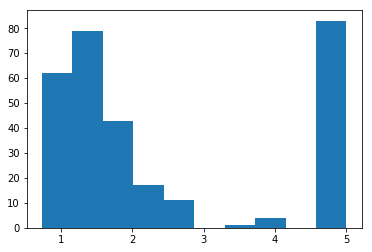

In [48]:
max_seeing = []
for pg in Pointing_Groups[0:300]:
    if np.sum(np.isnan(np.array(pg['Seeing']).astype(float))) == len(pg['Seeing']):
        max_seeing.append(5)
    else:
        max_seeing.append(np.max(pg['Seeing'][~np.isnan(np.array(pg['Seeing']).astype(float))]))
_ = plt.hist(max_seeing)

In [63]:
max_seeing = np.array(max_seeing)
np.where(max_seeing<1.3)

(array([ 34,  35,  36,  61,  62,  63,  64,  65,  66,  67,  69,  70,  73,
         76,  77,  78,  79,  82,  86,  95, 180, 181, 183, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 202, 203, 204,
        205, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 252,
        256, 257, 258, 259, 264, 265, 266, 267, 284, 285, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298]),)

In [60]:
Pointing_Groups[78]

,visit_id,date_obs,ra,dec,filename,survey_night,stellar_density,Seeing
0,438701,b'2015-05-20 02:01:23.368',228.453542,-27.287944,b'c4d_150520_020254_ooi_VR_v2.fits.fz',20,5975.0,0.822
1,438705,b'2015-05-20 02:05:57.128',228.453417,-27.289083,b'c4d_150520_020728_ooi_VR_v2.fits.fz',20,5975.0,0.769
2,438709,b'2015-05-20 02:10:32.308',228.453833,-27.288694,b'c4d_150520_021203_ooi_VR_v2.fits.fz',20,5975.0,0.573
3,438713,b'2015-05-20 02:15:07.17',228.452792,-27.289028,b'c4d_150520_021637_ooi_VR_v2.fits.fz',20,5975.0,0.634
4,438717,b'2015-05-20 02:19:42.179',228.453792,-27.289167,b'c4d_150520_022111_ooi_VR_v2.fits.fz',20,5975.0,0.753
5,439352,b'2015-05-21 02:11:47.209',228.450208,-27.287528,b'c4d_150521_021317_ooi_VR_v1.fits.fz',21,5975.0,0.987
6,439356,b'2015-05-21 02:16:22.883',228.450167,-27.287028,b'c4d_150521_021750_ooi_VR_v1.fits.fz',21,5975.0,0.966
7,439360,b'2015-05-21 02:20:56.252',228.449833,-27.287417,b'c4d_150521_022228_ooi_VR_v1.fits.fz',21,5975.0,0.777
8,439364,b'2015-05-21 02:25:30.037',228.450583,-27.287278,b'c4d_150521_022658_ooi_VR_v1.fits.fz',21,5975.0,0.79
9,439368,b'2015-05-21 02:30:03.462',228.449833,-27.286806,b'c4d_150521_023132_ooi_VR_v1.fits.fz',21,5975.0,0.846


In [77]:
import numpy as np

def distHModulus(d_BO):
    # Only valid at opposition
    return(5*np.log10(d_BO*(d_BO-1)))

def planetaryPhaseFunction(angle):
    # Approximation to the phase function. Assumes an ideal diffuse reflecting sphere
    return(2/3*(1-angle/np.pi)*np.cos(angle)+1/np.pi*np.sin(angle))

def asteroidPhaseFunction(angle,G):
    # Approximation to the phase function. Uses HG asteroidal model

    return((1-G)*phiFunction(angle,1)+G*phiFunction(angle,2))

def phiFunction(angle,i):
    # phi function for HG asteroidal model
    if i==1:
        A = 3.332
        B = 0.631
    elif i==2:
        A = 1.862
        B = 1.218
    else:
        print('Error! Select i=1 or i=2')
        return()
    
    return(np.exp(-A*np.tan(angle/2)**B))

def apparentMag(H,G,distance,phase_angle):
    # Apparent magnitude for a Solar System object given H and distance
    return(H + distHModulus(distance) - 2.5 * np.log10(asteroidPhaseFunction(phase_angle,G)))

print(apparentMag(10,0.15,47,0))

26.674278448086458


In [22]:
import astropy.units as u
import numpy as np
#Find the angular resolution of a KBO binary

radius = 54 * u.km #Radius of the binary
a_div_RH = 0.05 #a/R_h value for the binary. Typical values are < 0.07. 0 is a contact binary.

a_sun = 44 * u.au
rho = (3*u.g/u.cm**3)
m = rho * (4/3*np.pi*radius**3)
e_sun = 0.02
m_sun = 2*10**30*u.kg
RH = a_sun*(1-e_sun)*(m/(3*m_sun))**(1/3)
a_bin = a_div_RH * RH
a_bin = 24000 * u.km
angle = a_bin.to(u.au) / a_sun * u.rad

print('This KBO binary has an angular resolution of about {}'.format(angle.to(u.arcsec)))

This KBO binary has an angular resolution of about 0.752070036881747 arcsec


In [81]:
np.sqrt(np.sin(21*np.pi/180)**2+.15**2)

0.3884939990029484

In [23]:
# Binary semi-major axis for known TNO binaries (km) (Noll 2018)
binary_a = np.array([11374,1580,13330,4750,8220,2500,1850,4530,2770,27600,9000,4090,5720,2370,2270,
            37270,9900,7800,26800,4810,6040,9960,20990,33000,6670,1590,7700,6940,3030,22620,
            3310,3400,34300,4990,3810,102100,9310,22400,8550,3830,54000,10400,69000,25400,
            27000])
len(binary_a[binary_a>24000/2])/len(binary_a)

0.3111111111111111

In [19]:
22000/2

11000.0